1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
2. Atleta con el menor número de apariciones y mayores ganancias.
3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.
5. País con mayor número de deportes con atletas en el dataset.
6. ¿Cuántos atletas por deporte tiene cada país?
7. Ganancia mínima y máxima (dentro del dataset) por deporte y por país.
8. Atleta con mayores ganancias por deporte por década
9. Ganancia total por cada deporte por cada año.

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt 
from datetime import datetime
import plotly.graph_objs as go


In [ ]:
df = pd.read_csv('/content/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df['Sport']= df['Sport'].str.upper()
df

In [ ]:
#1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
df_rank=df.copy()
df_rank.drop(columns=('S.NO'),inplace=True)

#Eliminar los años menores a 2010 o mayores a 2020
for index, row in df_rank.iterrows():
  if (row['Year']<2010) or (row['Year']>2020):
    df_rank.drop(labels=index,inplace=True)

#Limpiar Previous Year Rank
df_rank['Previous Year Rank']= df_rank['Previous Year Rank'].str.replace('>','').replace('?',0).replace('??','0').fillna(0)
df_rank
df_rank['Previous Year Rank']=df_rank['Previous Year Rank'].astype(int)

#Obtener los deportistas cuyo rank ha subido 2 lugares a comparación del año pasado
for index,row in df_rank.iterrows():
  if row['Previous Year Rank']-2<row['Current Rank']:
    df_rank.drop(labels=index,inplace=True)

#Limpiar la tabla final
df_rank= df_rank.reset_index().drop(columns='index')
df_rank


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Floyd Mayweather,USA,2,10,BOXING,2010,65.0
1,Phil Mickelson,USA,4,6,GOLF,2010,46.0
2,Roger Federer,Switzerland,6,10,TENNIS,2010,43.0
3,LeBron James,USA,3,7,BASKETBALL,2011,48.0
4,Roger Federer,Switzerland,4,6,TENNIS,2011,47.0
5,Cristiano Ronaldo,Portugal,7,13,SOCCER,2011,38.0
6,Alex Rodriguez,Dominican,8,12,BASEBALL,2011,35.0
7,Michael Schumacher,Germany,9,20,F1 RACING,2011,34.0
8,Lionel Messi,Argentina,10,20,SOCCER,2011,32.3
9,Manny Pacquiao,Filipino,2,24,BOXING,2012,62.0


In [15]:
#2. Atleta con el menor número de apariciones y mayores ganancias.
df3=df.drop(columns =['S.NO', 'Sport', 'Nationality', 'Current Rank', 'Previous Year Rank','Year'] )
Nombres= pd.DataFrame(df['Name'].value_counts())
Nombres1=Nombres['Name']==1
Nombres=Nombres[Nombres1]
Nombres=Nombres.reset_index().drop(columns=['Name']).rename(columns = {'index':'Nombre'})
df3['Name']=df3['Name'].astype(str).copy()
df3[df3['Name'].isin(Nombres.Nombre.tolist())].sort_values('earnings ($ million)',ascending=False)



,Name,earnings ($ million)
274,Conor McGregor,99.0
284,Canelo Alvarez,94.0
286,Russell Wilson,89.5
287,Aaron Rogers,89.3
299,Kirk Cousins,60.5
280,Matthew Stafford,59.5
300,Carson Wentz,59.1
256,Novak Djokovic,55.8
153,Muhammad Ali,55.0
257,Cam Newton,53.1


In [76]:
#3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.
df_NoRankeados= df.copy()
df_NoRankeados['Previous Year Rank']= df_NoRankeados['Previous Year Rank'].str.replace('>','').replace('<','').replace('?','0').replace('??','0').replace('none','0').replace('not ranked','0').fillna(0)
df_NoRankeados['Previous Year Rank']= df_NoRankeados['Previous Year Rank'].astype(int).sort_values()
df_NoRankeados= df_NoRankeados.sort_values(['Previous Year Rank'])==0
df_NoRankeados
df_NoRankeados2=df.copy()
df_NoRankeados2=df_NoRankeados2[df_NoRankeados['Previous Year Rank']]
df_NoRankeados2

Paises = pd.DataFrame(df_NoRankeados2['Nationality'].value_counts())
Paises
###

trace = go.Bar(
                    y = Paises.index ,
                    x = Paises['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Paises con más atletas no rankeados',width=800, height=500, 
                       xaxis= dict(title='Jugadores'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
fig


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [77]:
Deportes = pd.DataFrame(df_NoRankeados2['Sport'].value_counts())
Deportes
trace = go.Bar(
                    y = Deportes.index ,
                    x = Deportes['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Deportes con más atletas no rankeados',width=800, height=500, 
                       xaxis= dict(title='Número de atletas'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
fig


In [55]:
# 4. País con mayor número de deportes con atletas en el dataset.
País_con_mayor_deportes =  df.groupby(["Nationality"]).size()
País_con_mayor_deporte = df["Nationality"].max()
print("País con mayor número de deportes con atletas en el dataset es",País_con_mayor_deporte)

Mayor_deportes=  df.groupby(["Nationality"]).size()
Mayor_deportes= df['Nationality'].value_counts().to_frame()
trace = go.Bar(
                    y = Mayor_deportes.index,
                    x = Mayor_deportes['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='País con mayor número de deportes con atletas',width=800, height=500, 
                       xaxis= dict(title='Número de atletas'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
fig


País con mayor número de deportes con atletas en el dataset es USA


In [ ]:
#5. ¿Cuántos atletas por deporte tiene cada país?
sin_duplicado= df.drop_duplicates(subset=['Name'])
B = pd.DataFrame(sin_duplicado.groupby(["Nationality", "Sport"])["Name"].count())
Número_de_atletas = B.rename(columns = {"Name":"Número de atletas"})
Número_de_atletas

Número de atletas
Nationality      Sport                                          
Argentina        SOCCER                                        1
Australia        GOLF                                          1
Austria          AUTO RACING                                   1
Brazil           AUTO RACING                                   1
                 SOCCER                                        2
Canada           AUTO RACING                                   1
                 BOXING                                        1
                 HOCKEY                                        1
                 ICE HOCKEY                                    1
Finland          F1 RACING                                     1
France           AUTO RACING                                   1
Germany          AUTO RACING                                   1
Ireland          MMA                                           1
Italy            MOTORCYCLE GP                                 1
Mexico           BOXING                                        1
Northern Ireland GOLF                                          1
Philippines      BOXING                                        1
Portugal         SOCCER                                        1
Russia           ICE HOCKEY                                    1
Serbia           TENNIS                                        1
Spain            TENNIS                                        1
Switzerland      TENNIS                                        1
UK               AUTO RACING                                   2
                 SOCCER                                        1
USA              AMERICAN FOOTBALL                            15
                 AMERICAN FOOTBALL / BASEBALL                  1
                 AUTO RACING (NASCAR)                          1
                 BASEBALL                                      3
                 BASKETBALL                                   11
                 BOXING                                       11
                 CYCLING                                       1
                 GOLF                                          5
                 NASCAR                                        2
                 NBA                                           1
                 NFL                                           2
                 TENNIS                                        3

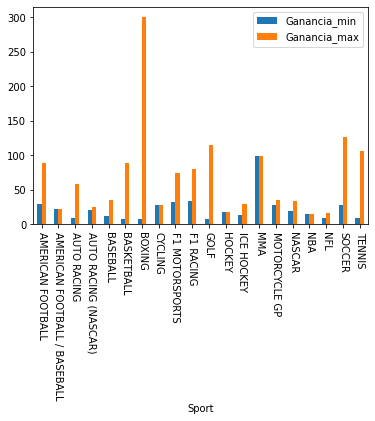

In [67]:
#6. Ganancia mínima y máxima (dentro del dataset) por deporte y por país.
Ganancia_por_deporte = df.groupby("Sport")["earnings ($ million)"].agg(Ganancia_min = "min", Ganancia_max = "max")
Ganancia_por_deporte
Ganancia_por_deporte.plot.bar(rot=270, stacked=False)

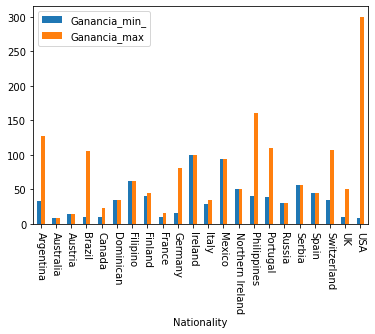

In [66]:
Ganancia_por_país = df.groupby("Nationality")["earnings ($ million)"].agg(Ganancia_min_ = "min", Ganancia_max = "max")
Ganancia_por_país
Ganancia_por_país.plot.bar(rot=270, stacked=False)


In [ ]:
#7. Atleta con mayores ganancias por deporte por década
df2=df.copy()
bins = [1989, 1999, 2009, 2019, 2029]
label = ['1990-1999', '2000-2009', '2010-2019', '2020']
df2['Year'] = pd.cut(df2['Year'], bins = bins, labels = label)
df2=df2.drop(columns =['S.NO', 'Nationality', 'Current Rank', 'Previous Year Rank',] )
df_Gan = df2.reset_index().pivot_table(values="Name", index="Sport", columns="Year", aggfunc='max')
df_Gan


Year,1990-1999,2000-2009,2010-2019,2020
Sport,,,,
AMERICAN FOOTBALL,NaN,Tom Brady,Terrell Suggs,Kirk Cousins
AMERICAN FOOTBALL / BASEBALL,Deion Sanders,NaN,NaN,NaN
AUTO RACING,Nigel Mansell,Michael Schumacher,Lewis Hamilton,NaN
AUTO RACING (NASCAR),NaN,Jeff Gordon,NaN,NaN
BASEBALL,Gary Sheffield,Alex Rodriguez,Alex Rodriguez,NaN
BASKETBALL,Shaquille O'Neal,Shaquille O'Neal,Stephen Curry,Stephen Curry
BOXING,Sugar Ray Leonard,Oscar De La Hoya,Manny Pacquiao,NaN
CYCLING,NaN,Lance Armstrong,NaN,NaN
F1 MOTORSPORTS,Michael Schumacher,Michael Schumacher,NaN,NaN


In [ ]:
#8. Ganancia total por cada deporte por cada año.
df1=df.drop(columns =['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',] )
df_Total = df1.reset_index().pivot_table(values="earnings ($ million)", index="Year", columns="Sport", aggfunc='mean')
df_Total=df_Total.fillna(0)
df_Total

Sport,AMERICAN FOOTBALL,AMERICAN FOOTBALL / BASEBALL,AUTO RACING,AUTO RACING (NASCAR),BASEBALL,BASKETBALL,BOXING,CYCLING,F1 MOTORSPORTS,F1 RACING,GOLF,HOCKEY,ICE HOCKEY,MMA,MOTORCYCLE GP,NASCAR,NBA,NFL,SOCCER,TENNIS
Year,,,,,,,,,,,,,,,,,,,,
1990,0.0,0.0,9.50,0.0,0.0,8.100000,18.925000,0.0,0.0,0.0,8.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
1991,0.0,0.0,11.00,0.0,0.0,16.000000,29.175000,0.0,0.0,0.0,8.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
1992,0.0,0.0,18.25,0.0,0.0,35.900000,28.000000,0.0,0.0,0.0,10.15,0.0,0.0,0.0,0.0,0.0,0.0,9.5,0.000000,9.50
1993,0.0,0.0,17.25,0.0,12.7,36.000000,18.600000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,15.2,11.5,0.000000,12.60
1994,0.0,0.0,12.40,0.0,0.0,23.350000,12.050000,0.0,0.0,0.0,14.20,0.0,13.5,0.0,0.0,0.0,0.0,0.0,0.000000,11.40
1995,0.0,22.5,15.00,0.0,0.0,32.900000,26.733333,0.0,0.0,0.0,15.10,0.0,14.5,0.0,0.0,0.0,0.0,0.0,0.000000,16.00
1996,0.0,0.0,0.00,0.0,0.0,25.700000,45.250000,0.0,33.0,0.0,15.10,0.0,0.0,0.0,0.0,0.0,0.0,16.5,0.000000,15.20
1997,0.0,0.0,0.00,0.0,0.0,40.233333,39.766667,0.0,35.0,0.0,26.10,17.9,0.0,0.0,0.0,19.1,0.0,0.0,0.000000,0.00
1998,0.0,0.0,0.00,0.0,17.2,36.300000,18.500000,0.0,38.0,0.0,22.45,0.0,29.8,0.0,0.0,24.1,0.0,0.0,0.000000,0.00


In [79]:
df_NoRankeados2.to_csv('Atletas no rankeados.csv', index = False)